<a href="https://colab.research.google.com/github/Cardomper/TFM/blob/main/TFM_Carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIRECTORIO = "/content/drive/MyDrive/CarlosD"
#DIRECTORIO = "/content/drive/MyDrive/UOC2021-2022-2/Carlos_Dominguez"

In [ ]:
cd {DIRECTORIO}

/content/drive/MyDrive/CarlosD


In [ ]:
ls

'Copy of leyendoDatos de Santiago.ipynb'   notebooks_Ejemplo/   text_data.csv
 dataset/                                  PECs/
 Documentos_plantillas_UOC/                test/


In [ ]:
import os

In [ ]:
folder = os.path.join(DIRECTORIO,"dataset")
# print(folder)

fname_data1 = os.path.join(folder,'scerevisiae.rsd1.lmbda_22.npz')

print(fname_data1)

/content/drive/MyDrive/UOC2021-2022-2/Carlos_Dominguez/dataset/scerevisiae.rsd1.lmbda_22.npz


In [ ]:
import numpy as np

def load_data(fname):
    # X is multi-variable array
    # Y contains single variable - fix shape for Keras

    npzfile = np.load(fname)
    Xh_train = npzfile['arr_0']
    Xh_test = npzfile['arr_1']
    Xv_train = npzfile['arr_2']
    Xv_test = npzfile['arr_3']
    Y_train = npzfile['arr_4']
    Y_test = npzfile['arr_5']

    X_train = list()
    X_train.append(Xh_train)
    X_train.append(Xv_train)
    X_test = list()
    X_test.append(Xh_test)
    X_test.append(Xv_test)

    Y_train = Y_train.astype(np.float32).reshape((-1,1))
    Y_test = Y_test.astype(np.float32).reshape((-1,1))

    return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = load_data(fname_data1) 
print(len(X_test))
print(len(Y_test))

2
425


In [ ]:
X_train[-1].shape

(3813, 72)

In [ ]:
X_train[0].shape

(3813, 2150, 4)

In [ ]:
X_test[0].shape

(425, 2150, 4)

In [ ]:
X_train[1].shape

(3813, 72)

In [ ]:
input_shapes = [sl.shape[1:] for sl in X_train]

In [ ]:
input_shapes

[(2150, 4), (72,)]

In [ ]:
Y_train.shape

(3813, 1)

In [ ]:
X_train[0][0,:,:]

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]], dtype=int8)

In [ ]:
X_train[1][:,9:].max()

223

In [ ]:
X_train_desp = X_train[0].reshape((3813,2150*4))

In [ ]:
X2_train = X_train[1]
X2_test = X_test[1]
print(X2_train.shape)
print(X2_test.shape)

(3813, 72)
(425, 72)


In [ ]:
#Unimos X e Y
X2_data=np.concatenate([X2_train,X2_test], axis=0)
Y_data=np.concatenate([Y_train,Y_test], axis=0)

In [ ]:
np.savetxt("X2_data.csv",X2_data,fmt='%s',delimiter=",", comments="")
np.savetxt("Y_data.csv",Y_data,fmt='%s',delimiter=",", comments="")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


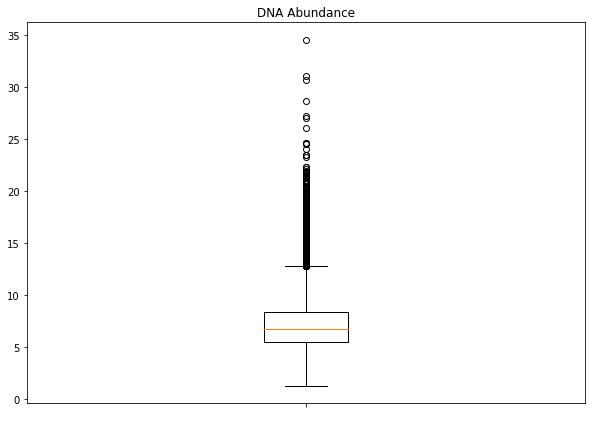

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
plt.boxplot(Y_data)
ax = fig.add_subplot(111)
ax.set_xticklabels(" ")
 
# Adding title
plt.title("DNA Abundance")
 
plt.show()

In [ ]:
Y_data[:,0].shape

(4238,)

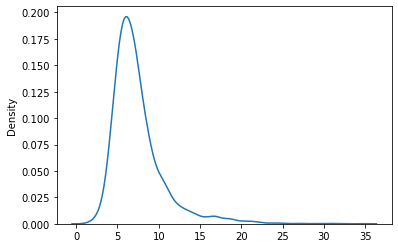

In [ ]:
import seaborn as sns

sns.kdeplot(Y_data[:,0])

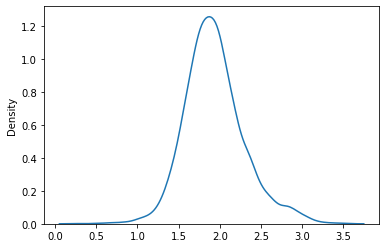

In [ ]:
import seaborn as sns

sns.kdeplot(np.log(Y_data[:,0]))

In [ ]:
np.log(Y_data[:,0]).std()

0.3653597

#Random forest (datos no secuenciales)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X2_train, Y_train.ravel())

RandomForestRegressor()

In [ ]:
model.score(X2_test,Y_test.ravel())

0.7656984068364819

# Convertir a secuencia de texto

Hay un problema hay partes que son todas cero [0, 0, 0, 0] debido al padding. El paper menciona que las regiones UTR. Sin embargo, esto no debería ser un problema, dado que cuando se trabaja con textos, los textos no son de igual longitud. Por lo que se extrae sólo la parte de las secuencia que no son ceros

In [ ]:
letras = np.array(['A', 'C', 'G', 'T'])

In [ ]:
def conv_to_text(dataset):
  seq_list=[]
  for i in range(dataset[0].shape[0]):
    secuencia=""
    seq_list.append(secuencia.join(letras[np.where(dataset[0][i])[1]]))
  seq_list=np.array(seq_list)
  return seq_list

In [ ]:
X_train_text=conv_to_text(X_train)
X_train_text.shape

(3813,)

In [ ]:
X_test_text=conv_to_text(X_test)
X_test_text.shape

(425,)

In [ ]:
X_train_text=X_train_text[:, np.newaxis] #Añadimos una dimensión para poder unir X e Y
X_test_text=X_test_text[:, np.newaxis]
train=np.concatenate([X_train_text, Y_train], axis=1)
test=np.concatenate([X_test_text, Y_test], axis=1)
text_data=np.concatenate([train,test], axis=0)

In [ ]:
np.savetxt("text_data.csv",text_data,fmt='%s',delimiter=",", header="sequence,target", comments="")

In [ ]:
import pandas as pd
text_data = pd.read_csv('text_data.csv')
print(len(text_data))

4238


# Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
text_data[["target"]]=scale.fit_transform(text_data[["target"]])
text_data.to_csv('text_data_norm.csv')
text_data.head()

,sequence,target
0,TGCGGAATCTTAATTGTGCGGATCCTTTTACCTTTTCTCATATTAA...,0.386194
1,AGCGCCAAACGAAATATTGCTTTTGTAGAAGGGTTGAAGAAGGTAC...,-0.711836
2,ATACCAATTACTGTCCGTAGTTCGTCAGATTAGAATCCACTATATT...,-0.148928
3,AGGGTTACAAGTACAAGATGAGATACGTCTACGCGCATTTCCCAAT...,0.742004
4,ACAAATCAGCTCCGATCTTCTCATATGAAAATCAGCAGCCGTGACA...,1.092220


In [ ]:
(text_data.sequence.apply(len)>1800).sum()

1124

# Pytorch

In [ ]:
#!pip3 uninstall numpy
#pip install -U numpy

Found existing installation: numpy 1.21.5
Uninstalling numpy-1.21.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.5


In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchtext
import time
import random
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data.dataset import random_split

torch.backends.cudnn.deterministic = True

## Datos

In [ ]:
def split(word):
    return list(word)

Aquí vemos que las secuencias tienen longitudes distintas:

In [ ]:
text_data = pd.read_csv('text_data_norm.csv')

print(len(split(text_data["sequence"].iloc[0])))
print(len(split(text_data["sequence"].iloc[4])))

1566
1765


### Read data

In [ ]:
class TextData(Dataset):
    '''
    Dataset basico para leer las secuencias
    '''
    def __init__(self, filename):
        super(TextData, self).__init__()
        df = pd.read_csv(filename)
        self.df = df[["sequence", "target"]]
        
    def __getitem__(self, index):
        return self.df.iloc[index,0], np.log(self.df.iloc[index,1])
    
    def __len__(self):
        return len(self.df)

In [ ]:
ds = TextData("text_data.csv")

In [ ]:
tr_per = 0.8
train_dataset, valid_dataset = random_split(ds,
 [int(len(ds)*tr_per),len(ds) - int(len(ds)*tr_per)], torch.manual_seed(42))

In [ ]:
text_data.target.min()

-1.934744067668322

### Tokenización

In [ ]:
## Paso 2: Encuentre tokens únicos (palabras)
import re
import numpy as np
from collections import Counter, OrderedDict
from textwrap import wrap


token_counts = Counter()

def tokenizer(text):
    tokenized = wrap(text,6)
    tokenized = ["<beg>"] + tokenized + ["<end>"] #Añadimos un token de inicio y otro de fin de la secuencia
    return tokenized


for line, label in train_dataset:
    tokens = tokenizer(line)
    token_counts.update(tokens)
 
    
print('Vocab-size:', len(token_counts))

Vocab-size: 4783




### Numericalización






In [ ]:
## Paso 3: Codificación de cada token único en enteros

from torchtext.vocab import vocab

sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
ordered_dict = OrderedDict(sorted_by_freq_tuples)

vocab = vocab(ordered_dict)

vocab.insert_token("<pad>", 0)
vocab.insert_token("<unk>", 1)
vocab.set_default_index(1)

print([vocab[token] for token in ["A","C","T","G","AA","AC","TG"]])

[2435, 3148, 1878, 3125, 3866, 4114, 4097]


In [ ]:
## Paso 3-A: Defina las funciones para la transformación.

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]



## Paso 3-B: función de codificación y transformación
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _text, _label in batch:
        label_list.append(_label) #¿Hay que usar label list?
        processed_text = torch.tensor(text_pipeline(_text), 
                                      dtype=torch.int64)
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True)
    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

In [ ]:
## Toma un pequeño batch

from torch.utils.data import DataLoader
dataloader = DataLoader(train_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch)
text_batch, label_batch, length_batch = next(iter(dataloader))
print(text_batch)
print(label_batch)
print(length_batch)
print(text_batch.shape)

tensor([[   4, 2293,   39,  ...,    0,    0,    0],
        [   4, 1721,  882,  ...,    0,    0,    0],
        [   4, 1370, 1922,  ...,  305, 3010,    5],
        [   4,  888,  604,  ...,    0,    0,    0]], device='cuda:0')
tensor([1.6278, 2.0195, 1.4218, 1.8468], device='cuda:0', dtype=torch.float64)
tensor([277, 264, 282, 278], device='cuda:0')
torch.Size([4, 282])


In [ ]:
## Paso 4: batching los datasets

batch_size = 64

train_dl = DataLoader(train_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(valid_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)

## Modelo LSTM

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,num_layers=2,
                           batch_first=True,bidirectional = True, dropout=0.4 )
        self.fc1 = nn.Linear(rnn_hidden_size*2, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        # out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 64
fc_hidden_size = 32

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

#### Entrenamiento

##### MSE

In [ ]:
train_losses=[]
val_losses=[]

def train(dataloader):
    model.train()
    total_loss = 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred.float(), label_batch.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*label_batch.size(0)
        
    train_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred.float(), label_batch.float())
            total_loss += loss.item()*label_batch.size(0)
            
    val_losses.append(total_loss/len(dataloader.dataset))       
    return total_loss/len(dataloader.dataset)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 3.4400 loss valid: 2.9223
Epoch 1 loss train: 2.0854 loss valid: 0.7265
Epoch 2 loss train: 0.2293 loss valid: 0.1320
Epoch 3 loss train: 0.1430 loss valid: 0.1325
Epoch 4 loss train: 0.1409 loss valid: 0.1320
Epoch 5 loss train: 0.1395 loss valid: 0.1309
Epoch 6 loss train: 0.1396 loss valid: 0.1310
Epoch 7 loss train: 0.1380 loss valid: 0.1280
Epoch 8 loss train: 0.1376 loss valid: 0.1289
Epoch 9 loss train: 0.1372 loss valid: 0.1274
Epoch 10 loss train: 0.1366 loss valid: 0.1274
Epoch 11 loss train: 0.1358 loss valid: 0.1275
Epoch 12 loss train: 0.1348 loss valid: 0.1277
Epoch 13 loss train: 0.1352 loss valid: 0.1278
Epoch 14 loss train: 0.1346 loss valid: 0.1282
Epoch 15 loss train: 0.1342 loss valid: 0.1270
Epoch 16 loss train: 0.1339 loss valid: 0.1280
Epoch 17 loss train: 0.1337 loss valid: 0.1278
Epoch 18 loss train: 0.1327 loss valid: 0.1272
Epoch 19 loss train: 0.1330 loss valid: 0.1279
Epoch 20 loss train: 0.1332 loss valid: 0.1278
Epoch 21 loss train: 0.

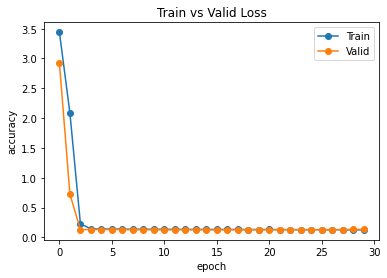

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')

plt.show()

##### R2

In [ ]:
y=[]
y_pred=[]
with torch.no_grad():
    model.eval()
    for text_batch, label_batch, lengths in valid_dl:

        outputs = model(text_batch, lengths)[:, 0]
        y.append(label_batch.cpu().numpy())
        y_pred.append(outputs.cpu().numpy())

In [ ]:
y_pred = [a.squeeze().tolist() for a in y_pred]
y = [a.squeeze().tolist() for a in y]


In [ ]:
y_pred = [item for sublist in y_pred for item in sublist]
y = [item for sublist in y for item in sublist]

In [ ]:
from sklearn.metrics import r2_score
r_square = r2_score(y, y_pred)
print(r_square)

-0.06871776965833365


## Modelo GRU

In [ ]:
class GRU(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.GRU(embed_dim, rnn_hidden_size,num_layers=2,
                           batch_first=True,bidirectional = True, dropout=0.5 )
        self.fc1 = nn.Linear(rnn_hidden_size*2, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden) = self.rnn(out)
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        # out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 64
fc_hidden_size = 32

torch.manual_seed(1)
model = GRU(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

### Entrenamiento

#### MSE

In [ ]:
train_losses=[]
val_losses=[]
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 15

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')


Epoch 0 loss train: 2.9297 loss valid: 1.8340
Epoch 1 loss train: 0.8915 loss valid: 0.1361
Epoch 2 loss train: 0.1508 loss valid: 0.1439
Epoch 3 loss train: 0.1490 loss valid: 0.1429
Epoch 4 loss train: 0.1456 loss valid: 0.1424
Epoch 5 loss train: 0.1426 loss valid: 0.1396
Epoch 6 loss train: 0.1457 loss valid: 0.1406
Epoch 7 loss train: 0.1434 loss valid: 0.1352
Epoch 8 loss train: 0.1408 loss valid: 0.1380
Epoch 9 loss train: 0.1424 loss valid: 0.1343
Epoch 10 loss train: 0.1406 loss valid: 0.1310
Epoch 11 loss train: 0.1398 loss valid: 0.1347
Epoch 12 loss train: 0.1373 loss valid: 0.1351
Epoch 13 loss train: 0.1384 loss valid: 0.1358
Epoch 14 loss train: 0.1385 loss valid: 0.1365


In [ ]:
np.sqrt(0.129)

0.35916569992135944

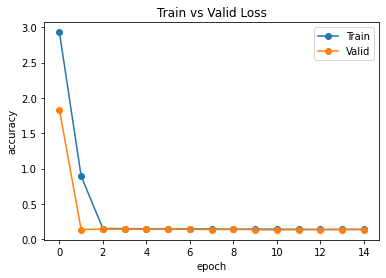

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss')

plt.show()

#### R2

In [ ]:
y=[]
y_pred=[]
with torch.no_grad():
    model.eval()
    for text_batch, label_batch, lengths in valid_dl:

        outputs = model(text_batch, lengths)[:, 0]
        y.append(label_batch.cpu().numpy())
        y_pred.append(outputs.cpu().numpy())

In [ ]:
y_pred = [a.squeeze().tolist() for a in y_pred]
y = [a.squeeze().tolist() for a in y]
y=sum(y,[])
y_pred=sum(y_pred,[])

In [ ]:
from sklearn.metrics import r2_score
r_square = r2_score(y, y_pred)
print(r_square)

-0.09600776668206468


## RNN con frecuencias de nucleótidos

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [ ]:
X2_data=np.loadtxt('X2_data.csv', delimiter=',')
Y_data=np.loadtxt('Y_data.csv', delimiter=',')

In [ ]:
X2_data.shape

(4238, 72)

In [ ]:
Y_data.shape

(4238,)

In [ ]:
class PrepareDataset(torch.utils.data.Dataset):

  def __init__(self, X, y, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      # Apply scaling if necessary
      if scale_data:
          X = StandardScaler().fit_transform(X)
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [ ]:
from torch.utils.data.dataset import random_split
dataset = PrepareDataset(X2_data, Y_data)
tr_per = 0.7
train2_dataset, valid2_dataset = random_split(dataset,
 [int(len(dataset)*tr_per),len(dataset) - int(len(dataset)*tr_per)], torch.manual_seed(42))

train_dataloader = DataLoader(train2_dataset, batch_size=10, shuffle=True, num_workers=1)
valid_dataloader = DataLoader(valid2_dataset, batch_size=10, shuffle=True, num_workers=1)

### Modelo MLP

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(72, 64),
      nn.Dropout(p=0.1),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.Dropout(p=0.1),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

### MSE

In [ ]:
 # Run the training loop
train_losses=[]
val_losses=[]

def train(dataloader):
  model.train()
  total_loss = 0.0
    
  # Iterate over the DataLoader for training data
  for i, data in enumerate(dataloader, 0):
      
      # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
    optimizer.zero_grad()
      
      # Perform forward pass
    outputs = model(inputs)
      
      # Compute loss
    loss = loss_fn(outputs, targets)
      
      # Perform backward pass
    loss.backward()
      
      # Perform optimization
    optimizer.step()
      
      # Print statistics
    total_loss += loss.item()*inputs.size(0)
    
  train_losses.append(total_loss/len(dataloader.dataset))
  return(total_loss/len(dataloader.dataset))

def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
# Get and prepare inputs
          inputs, targets = data
          inputs, targets = inputs.float(), targets.float()
          targets = targets.reshape((targets.shape[0], 1))
# Perform forward pass
          outputs = model(inputs)
# Compute loss
          loss = loss_fn(outputs, targets)
          total_loss += loss.item()*inputs.size(0)
    val_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)

In [ ]:
model=MLP()
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 100

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dataloader)
    loss_eval = evaluate(valid_dataloader)
    

    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 57.5327 loss valid: 36.1011
Epoch 1 loss train: 25.1254 loss valid: 17.0885
Epoch 2 loss train: 16.5115 loss valid: 13.2893
Epoch 3 loss train: 12.6168 loss valid: 10.3965
Epoch 4 loss train: 10.2178 loss valid: 8.7013
Epoch 5 loss train: 8.5757 loss valid: 7.2996
Epoch 6 loss train: 7.6492 loss valid: 6.2239
Epoch 7 loss train: 6.4931 loss valid: 5.2989
Epoch 8 loss train: 5.7356 loss valid: 4.6114
Epoch 9 loss train: 5.1108 loss valid: 4.1626
Epoch 10 loss train: 4.8127 loss valid: 3.9093
Epoch 11 loss train: 4.6331 loss valid: 3.7152
Epoch 12 loss train: 4.3008 loss valid: 3.5627
Epoch 13 loss train: 4.3376 loss valid: 3.4590
Epoch 14 loss train: 4.2009 loss valid: 3.3448
Epoch 15 loss train: 4.1771 loss valid: 3.2743
Epoch 16 loss train: 3.9707 loss valid: 3.2048
Epoch 17 loss train: 3.9124 loss valid: 3.1709
Epoch 18 loss train: 3.7869 loss valid: 3.1073
Epoch 19 loss train: 3.8455 loss valid: 3.0863
Epoch 20 loss train: 3.6027 loss valid: 3.0553
Epoch 21 loss 

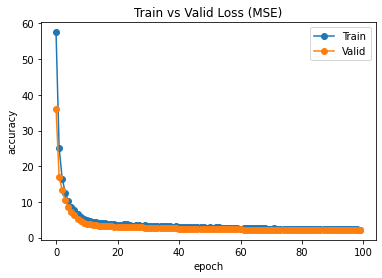

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss (MSE)')

plt.show()

### R2

In [ ]:
y=[]
y_pred=[]
with torch.no_grad():
    model.eval()
    for i, data in enumerate(valid_dataloader, 0):

        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        outputs = model(inputs)
        y.append(targets.numpy())
        y_pred.append(outputs.numpy())
        

In [ ]:
y_pred = [a.squeeze().tolist() for a in y_pred]
y = [a.squeeze().tolist() for a in y]
y=sum(y,[])
y_pred=sum(y_pred,[])

In [ ]:
from sklearn.metrics import r2_score
r_square = r2_score(y, y_pred)
print(r_square)

0.7510021051111953


### GRADIO

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.4 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 212 kB 73.8 MB/s 
     |████████████████████████████████| 1.1 MB 58.0 MB/s 
     |████████████████████████████████| 253 kB 62.7 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 2.0 MB 53.6 MB/s 
     |████████████████████████████████| 144 kB 70.9 MB/s 
     |████████████████████████████████| 94 kB 4.6 MB/s 
     |████████████████████████████████| 271 kB 70.7 MB/s 
     |████████████████████████████████| 11.1 MB 50.8 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 11.4 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 4.0 

In [ ]:
import gradio as gr


def RNA_PRED(file):

  import torch
  import numpy as np
  from torch import nn
  from torch.utils.data import DataLoader
  from sklearn.preprocessing import StandardScaler

  X2_data=np.loadtxt(file.name, delimiter=',')


  class PrepareDataset(torch.utils.data.Dataset):

    def __init__(self, X, scale_data=True):
      if not torch.is_tensor(X):
      # Apply scaling if necessary
        if scale_data:
          X = StandardScaler().fit_transform(X)
        self.X = torch.from_numpy(X)
        

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i]

  dataset = PrepareDataset(X2_data)

  pred_dataloader = DataLoader(dataset, batch_size=10, shuffle=False, num_workers=1)


  def evaluate(dataloader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
          inputs = data
          inputs= inputs.float()
          outputs = model(inputs)
          predictions.append(outputs.numpy())
    return np.concatenate(predictions, axis=0)

  np.savetxt("user_predictions.csv",evaluate(pred_dataloader),fmt='%s',delimiter=",", comments="") 
  return "user_predictions.csv"

iface = gr.Interface(
    RNA_PRED,
    ["file"],
    "file",
    description="Predicción de la abundancia de ARNm de S. cerevisiae")

iface.test_launch()

iface.launch()

Test launch: RNA_PRED()... SKIPPED
Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://51302.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f2961f69e10>,
 'http://127.0.0.1:7861/',
 'https://51302.gradio.app')

## Modelo combinado

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

class TextData(Dataset):
    '''
    Dataset basico para leer las secuencias
    '''
    def __init__(self, text_file, tabular_file, scale_data=True):
      self.text_file = text_file
      self.df= pd.read_csv(text_file)
      if not torch.is_tensor(tabular_file):
        if scale_data:
          tabular_file = StandardScaler().fit_transform(tabular_file)
        self.tabular_file=tabular_file

    def __getitem__(self, index):
        tabular_file=self.tabular_file.tolist()
        return np.log(self.df.iloc[index,1]), self.df.iloc[index,0], self.tabular_file[index]

    def __len__(self):
        return len(self.df)   
    

In [ ]:
X2_data=np.loadtxt('X2_data.csv', delimiter=',')

In [ ]:
ds = TextData("text_data.csv",X2_data)

In [ ]:
def collate_batch(batch):
    label_list, text_list, lengths, tabular_list = [], [], [], []
    for _label, _text, _tabular in batch:
        label_list.append(_label)
        tabular_list.append(_tabular)
        processed_text = torch.tensor(text_pipeline(_text))
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    tabular_list = torch.tensor(tabular_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True)
    return padded_text_list.to(device), label_list.to(device), lengths.to(device), tabular_list.to(device)

In [ ]:
tr_per = 0.8
train_dataset, valid_dataset = random_split(ds,
 [int(len(ds)*tr_per),len(ds) - int(len(ds)*tr_per)], torch.manual_seed(42))

In [ ]:
## Toma un pequeño batch

from torch.utils.data import DataLoader
dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False, collate_fn=collate_batch)
text_batch, label_batch, length_batch,tabular_batch = next(iter(dataloader))
print(text_batch)
print(label_batch)
print(length_batch)
print(text_batch.shape)
print(tabular_batch)

tensor([[   4, 2293,   39, 1730,   73, 2280, 1047,  257, 1040, 3187, 1883,   44,
         3568, 1262, 1324,  403,  327, 1846, 2411, 1078, 1254,  600, 3009, 1921,
         1902,  204, 3611, 2319,  270, 3370, 1731, 1048, 1165, 1620,  280, 1698,
          942, 1319,   20, 1574,  271, 1494, 1692, 1588,   71,  364, 2496,  297,
         1054,  531,  250, 3058,  323,  294,   20, 2991, 2957, 2732, 2109, 1066,
         2579, 1175,  752, 1073,  846, 1255, 1433, 3468,   68, 1079,   52, 2109,
         1903, 3204, 3059, 2320,  336,  305,  693,    6, 2224, 3681,  963,  101,
         1979, 3569, 2650,    2,  495, 1823,  926, 1256,  955,  490,  927,  814,
         1018,  464,  699,   96, 2216,    9, 3060, 3222, 1612,  700,  341, 2217,
          272, 2903,   25, 1094,  467, 2334,  562,  369,   90,  316,   30, 2958,
         1599, 2596, 3296, 2866, 1495, 1205, 1575, 2992, 3554, 2631, 1277,  706,
          129, 1824, 1295,  268, 2100, 1621, 1402, 2580,  505, 2687,  353,  129,
          365,  232,  888,  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
## Paso 4: batching los datasets

batch_size = 64

train_dl = DataLoader(train_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(valid_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)

### Modelo

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size,num_layers=2,
                           batch_first=True,bidirectional = True, dropout=0.7 )
        self.fc1 = nn.Linear(rnn_hidden_size*2, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        
     
        
        self.layers = nn.Sequential(
          nn.Linear(72, 64),
          nn.Dropout(p=0.1),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.Dropout(p=0.1),
          nn.ReLU(),
          nn.Linear(32, 1),
        )

        self.fc3 = nn.Linear(2, 1) 


    def forward(self, text, lengths, tab):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        # out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)        
        
        tab=self.layers(tab.float())
        x = torch.cat((out, tab), dim=1)
        x = self.relu(x)
        return self.fc3(x)

In [ ]:
vocab_size = len(vocab)
embed_dim = 50
rnn_hidden_size = 32
fc_hidden_size = 16

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

### Entrenamiento

#### MSE

In [ ]:
train_losses=[]
val_losses=[]

def train(dataloader):
    model.train()
    total_loss = 0
    for text_batch, label_batch, lengths, tabular in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths, tabular.float())
        label_batch = label_batch.unsqueeze(1)
        loss = loss_fn(pred.float(), label_batch.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*label_batch.size(0)
        
    train_losses.append(total_loss/len(dataloader.dataset))
    return total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for text_batch, label_batch, lengths, tabular in dataloader:
            pred = model(text_batch, lengths,tabular.float())
            label_batch = label_batch.unsqueeze(1)
            loss = loss_fn(pred.float(), label_batch.float())
            total_loss += loss.item()*label_batch.size(0)
            
    val_losses.append(total_loss/len(dataloader.dataset))       
    return total_loss/len(dataloader.dataset)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)

num_epochs = 30

torch.manual_seed(1)
 
for epoch in range(num_epochs):

    loss_train = train(train_dl)
    loss_eval = evaluate(valid_dl)
    
    print(f'Epoch {epoch} loss train: {loss_train:.4f} loss valid: {loss_eval:.4f}')

Epoch 0 loss train: 5.1870 loss valid: 4.7083
Epoch 1 loss train: 4.2008 loss valid: 3.4200
Epoch 2 loss train: 2.6498 loss valid: 1.4985
Epoch 3 loss train: 0.8385 loss valid: 0.2440
Epoch 4 loss train: 0.2109 loss valid: 0.1712
Epoch 5 loss train: 0.1654 loss valid: 0.1409
Epoch 6 loss train: 0.1426 loss valid: 0.1251
Epoch 7 loss train: 0.1299 loss valid: 0.1141
Epoch 8 loss train: 0.1171 loss valid: 0.1047
Epoch 9 loss train: 0.1093 loss valid: 0.0970
Epoch 10 loss train: 0.1021 loss valid: 0.0901
Epoch 11 loss train: 0.0944 loss valid: 0.0856
Epoch 12 loss train: 0.0883 loss valid: 0.0802
Epoch 13 loss train: 0.0844 loss valid: 0.0764
Epoch 14 loss train: 0.0808 loss valid: 0.0725
Epoch 15 loss train: 0.0766 loss valid: 0.0701
Epoch 16 loss train: 0.0756 loss valid: 0.0676
Epoch 17 loss train: 0.0729 loss valid: 0.0654
Epoch 18 loss train: 0.0708 loss valid: 0.0639
Epoch 19 loss train: 0.0690 loss valid: 0.0641
Epoch 20 loss train: 0.0688 loss valid: 0.0629
Epoch 21 loss train: 0.

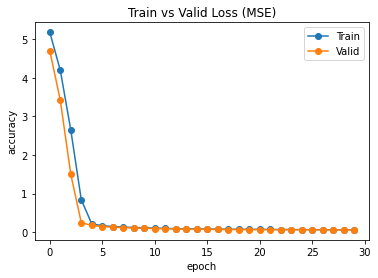

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Loss (MSE)')

plt.show()

#### R2

In [ ]:
y=[]
y_pred=[]
with torch.no_grad():
    model.eval()
    for text_batch, label_batch, lengths, tabular in valid_dl:

        outputs = model(text_batch, lengths,tabular.float())
        label_batch = label_batch.unsqueeze(1)
        y.append(label_batch.cpu().numpy())
        y_pred.append(outputs.cpu().numpy())

In [ ]:
y_pred = [a.squeeze().tolist() for a in y_pred]
y = [a.squeeze().tolist() for a in y]


In [ ]:
y_pred = [item for sublist in y_pred for item in sublist]
y = [item for sublist in y for item in sublist]

In [ ]:
r_square = r2_score(y, y_pred)
print(r_square)

0.5550829313667103
